### The bare rock model
In this model the atmosphere has no greenhouse effect, so, it's cold Earth. Now let's take a look into the formulas we can use to get the atmospheric temperatures.
$$ \sigma \cdot \epsilon \cdot T_{earth}^4 = \frac {(1-\alpha) \cdot I_{in}} {4}$$
where:

- $I_{in}$ = 1361 $Wm^{-2}$
- $\sigma$ = 5.670374419×$10^{−8}$ $(Wm^{-2}K^{-4})$
- T : absolute temperature (K)

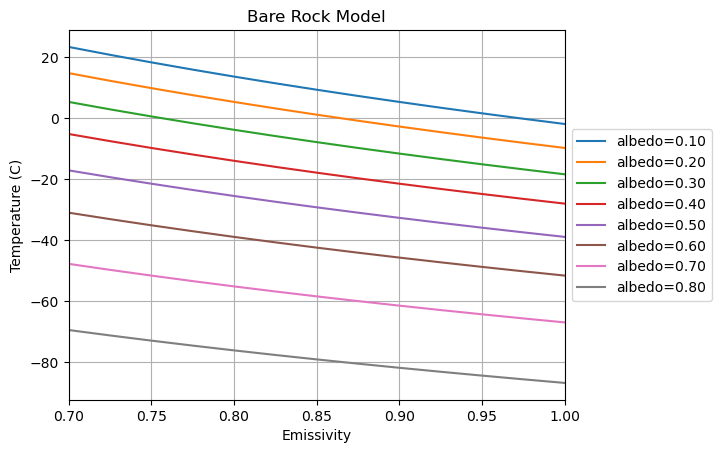

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
sigma = 5.670374419e-8
I = 1361
alpha = np.arange(0.1, 0.9, 0.1) # highest albedo on Venus is ~ 0.77
e = np.arange(0.7, 1.0, 0.025) 
# typical values of emissivity of earth and 
# atmosphere lies between this range
def bare_rock_model(e, alpha):
    T = ((1-alpha)*I/(sigma*e*4))**(1/4)
    return T-273
for i in alpha:
    plt.plot(e, bare_rock_model(e, i), label=f"albedo={i:.2f}")
ax = plt.subplot(111)
plt.xlabel("Emissivity")
plt.ylabel("Temperature (C)")
plt.title("Bare Rock Model")
plt.grid(True)
plt.xlim(0.7, 1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Now let's add an interactive plot where you can tweak the values of albedo to experiment yourself

In [ ]:
sigma = 5.670374419e-8
I = 1361
e = np.arange(0.7, 1.0, 0.025)
def interactive_model(alpha):
    T = ((1-alpha)*I/(sigma*e*4))**(1/4)
    t = T-273
    plt.plot(e, t, label=f"albedo={alpha:.2f}")
    plt.xlabel("Emissivity")
    plt.ylabel("Temperature (C)")
    plt.title(f"Bare Rock Model with albedo at {alpha:.2f}")
    plt.grid(True)
    plt.xlim(0.7, 1)
    plt.legend()
    plt.show()

alpha = widgets.FloatSlider(
    value=0.3,  
    min=0.1,  
    max=0.8,
    step=0.1,  
    description='Albedo: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal'
)

interactive_plot = widgets.interactive(interactive_model, alpha=alpha)
display(interactive_plot)

interactive(children=(FloatSlider(value=0.3, continuous_update=False, description='Albedo: ', max=0.8, min=0.1…